# Import modules


In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Data pre-processing

### Read gene data

In [2]:
genes = pd.read_csv("http://139.91.190.186/tei/bioinformatics/assignment.txt", sep="\t").iloc[:, 1:]

### Graph first 40 genes

Text(0.5, 1.0, 'Data pre-processing, first 40 genes')

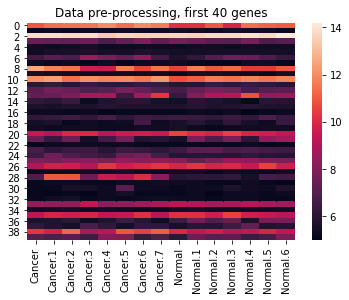

In [3]:
data_preprocessing_plot = sns.heatmap(genes.iloc[:40])
data_preprocessing_plot.set_title("Data pre-processing, first 40 genes")

# Data analysis

## Gene expression analysis using means

### Calculate Cancer class mean value

In [4]:
genes["Cancer.Mean"] = genes.filter(like="Cancer").mean(axis=1)

### Calculate Normal class mean value

In [5]:
genes["Normal.Mean"] = genes.filter(like="Normal").mean(axis=1)

### Calculate delta of Cancer and Normal mean values

In [6]:
genes["Means.Delta"] = genes["Cancer.Mean"] - genes["Normal.Mean"]

### Sort genes based by Means.Delta

In [7]:
means_delta_sorted_genes = genes.sort_values(by="Means.Delta")

### Select first 20 and last 20 genes from `Means.Delta` sorted gene data

In [8]:
sliced_means_delta_sorted_genes = pd.concat(
    [means_delta_sorted_genes.head(20), means_delta_sorted_genes.tail(20)],
    axis=0
)

### Graph 40 gene slice

Text(0.5, 1.0, 'Gene expression analysis using means')

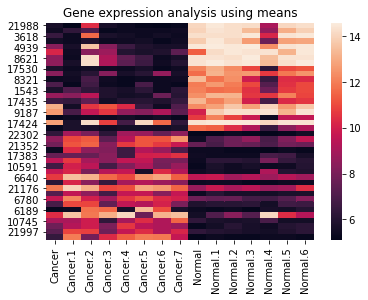

In [9]:
data_analysis_means_plot = sns.heatmap(sliced_means_delta_sorted_genes.iloc[:, :-3])
data_analysis_means_plot.set_title("Gene expression analysis using means")

## Gene expression analysis using *p*-value

### Calculate *p*-value for each gene

In [10]:
genes["p-value"] = [
    stats.ttest_ind(
        genes.iloc[gene_index, :8], genes.iloc[gene_index, 8:15]
    )[-1]
    for gene_index in range(genes.shape[0])
]

### Calculate *p*-value significant genes

In [11]:
alpha = 0.05

In [12]:
genes['Significant'] = genes[genes['p-value']<alpha]['p-value']

### Sort genes with `p-value < 0.05` by `Means.Delta`

In [13]:
signifiacnt_means_delta_sorted_genes = genes.sort_values(by="Means.Delta")

### Slice sorted data

In [14]:
sliced_signifiacnt_means_delta_sorted_genes = pd.concat([signifiacnt_means_delta_sorted_genes.head(20), signifiacnt_means_delta_sorted_genes.tail(20)], axis=0)

### Graph data slice

data_analysis_pvalue_plot = sns.heatmap(sliced_signifiacnt_means_delta_sorted_genes.iloc[:, :-5])
data_analysis_pvalue_plot.set_title("Gene expression analysis using p-value")

## Gene expression analysis using Bonferroni corrected *p*-value

### Calculate Bonferroni correction

In [15]:
bonferroni_correction = alpha / len(genes['p-value'])

### Calculate Bonferroni significant genes

In [16]:
genes['Bonferroni.Significant'] = genes[genes['p-value']<bonferroni_correction]['p-value']

### Sort Bonferroni significant genes by Means.Delta

In [17]:
bonferroni_significant_genes = genes[genes['Bonferroni.Significant'].notnull()]
bonferroni_significant_genes = bonferroni_significant_genes.sort_values(by='Means.Delta')

### Slice sorted data

In [18]:
sliced_bonferroni_significant_genes = pd.concat([bonferroni_significant_genes.head(20), bonferroni_significant_genes.tail(20)], axis=0)

### Graph gene slice

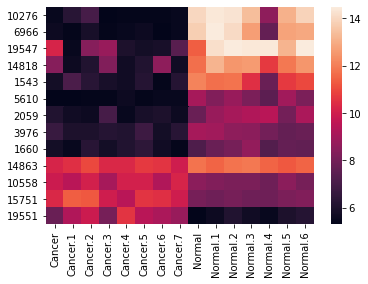

In [19]:
data_analysis_bonferroni_plot = sns.heatmap(bonferroni_significant_genes.iloc[:, :-6])

In [39]:
genes[genes['Significant'].notnull()]['Significant'].head(5)

0     0.003774
1     0.047076
10    0.020687
20    0.041384
23    0.005770
Name: Significant, dtype: float64

## Gene expression analysis using *q*-value

# Data validation